# Paper-Revising 
# single-speaker model visualization
#### 1. This notebook is to visualize 3 new single-speaker datasets
#### 2. each new dataset has 5 LSTM models from 2 layers to 6 layers
#### 3. select one test audio file for each dataset, then get the inpainting results of differents layers
#### 4. see which layer has the best result inpainting results (by using the MOS values of NB and WB)

## NOTEBOOK ATTENTION!
### 1. The csv file of the test audio file must be no (0, 1) when generating from the preprocessing.ipynb on 6.3 part.
### 2. ALL THE .csv file when put into the model, remember use no normalization (normalise=False)


In [1]:
import os
import json
import time
import math
import matplotlib.pyplot as plt
import numpy as np
from core.data_processor import DataLoader
from core.model import Model
from keras.utils.vis_utils import plot_model

In [2]:

# 绘图展示结果
def plot_results(predicted_data, true_data):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    ax.plot(true_data, label='True Data')
    plt.plot(predicted_data, label='Prediction')
    plt.legend()
    plt.grid()
    plt.show()
    #plt.savefig('results_2.png')


def plot_results_multiple(predicted_data, true_data, prediction_len):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    ax.plot(true_data, label='True Data')
    plt.legend()
    for i, data in enumerate(predicted_data):
        padding = [None for p in range(i * prediction_len)]
        plt.plot(padding + data, label='Prediction')
    plt.grid()
    plt.show()
    #plt.savefig('results_multiple_2.png')
    
def plot_results_multiple_onlypre(predicted_data, prediction_len):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    #ax.plot(true_data, label='True Data')
    plt.legend()
    for i, data in enumerate(predicted_data):
        padding = [None for p in range(i * prediction_len)]
        plt.plot(padding + data, label='Prediction')
    plt.grid()
    plt.show()
    #plt.savefig('results_multiple_2.png')

# Place to change the LSTM layer number

In [3]:

#读取所需参数
configs = json.load(open('640-80-6-layers.json', 'r'))
if not os.path.exists(configs['model']['save_dir']): os.makedirs(configs['model']['save_dir'])
#读取数据
data = DataLoader(
    os.path.join('data', configs['data']['visual_filename']),# change here to get the test dataset.
    configs['data']['visualization_full_split'], # change the train_test_split value to load the full audio file as an input.
    configs['data']['visual_filename_columns']
)

# Place to Change the model

In [4]:

#创建RNN模型
model = Model()
mymodel = model.build_model(configs)

model_path = '/home/shh/Desktop/LSTM_Final/saved_models/paper_revising/single-RyanSpeech/(revise_single_640_80_50epo_6layers_RyanSpeech)30062023-151302-e50.h5'
model.load_model(filepath = model_path)
#plot_model(mymodel, to_file='model.png',show_shapes=True)

[Model] Model Compiled
Time taken: 0:00:00.436677
[Model] Loading model from file /home/shh/Desktop/LSTM_Final/saved_models/paper_revising/single-RyanSpeech/(revise_single_640_80_50epo_6layers_RyanSpeech)30062023-151302-e50.h5


In [5]:

#测试结果
x_test, y_test = data.get_test_data(
    seq_len=configs['data']['sequence_length'],
    normalise=False # VERY IMPORTANT!!!!!!!!!!!!!1
    #normalise=configs['data']['normalise']
)

In [6]:
data

In [7]:
x_test[5621]

array([[ 2.61230469e-02],
       [ 2.28576660e-02],
       [ 2.21252441e-02],
       [ 2.09045410e-02],
       [ 1.73339844e-02],
       [ 1.82800293e-02],
       [ 2.33459473e-02],
       [ 2.97851562e-02],
       [ 2.89611816e-02],
       [ 1.94396973e-02],
       [ 1.09252930e-02],
       [ 1.35803223e-02],
       [ 1.88903809e-02],
       [ 1.55944824e-02],
       [ 1.27258301e-02],
       [ 7.62939453e-03],
       [ 2.01416016e-03],
       [ 5.21850586e-03],
       [ 8.39233398e-03],
       [ 5.52368164e-03],
       [ 3.96728516e-03],
       [ 4.97436523e-03],
       [-3.81469727e-03],
       [-1.10473633e-02],
       [-9.52148438e-03],
       [-4.73022461e-03],
       [-6.71386719e-04],
       [-2.53295898e-03],
       [-1.19323730e-02],
       [-1.85546875e-02],
       [-1.40380859e-02],
       [-8.94165039e-03],
       [-9.33837891e-03],
       [-9.94873047e-03],
       [-1.21154785e-02],
       [-1.64184570e-02],
       [-1.76086426e-02],
       [-1.75476074e-02],
       [-1.7

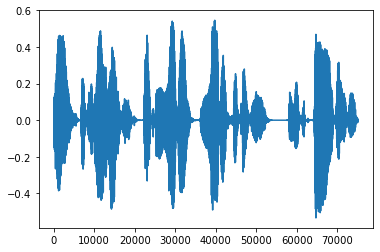

In [8]:
plt.plot(y_test)# without normal

# Predict

In [9]:
# prediction part
predictions_multiseq = model.predict_sequences_multiple(data=x_test, window_size=640, prediction_len=80,debug=False)


[Model] Predicting Sequences Multiple...


## (1) 2 layers LSTM

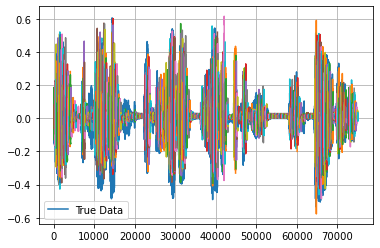

In [13]:
# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq, y_test, prediction_len=80)

In [14]:
# this function is to flatten list object
# predictions_multiseq is list, so need to flatten to plot and hear
def flatten(l):
    return [item for sublist in l for item in sublist]

In [15]:
flat_predictions_multiseq = flatten(predictions_multiseq)

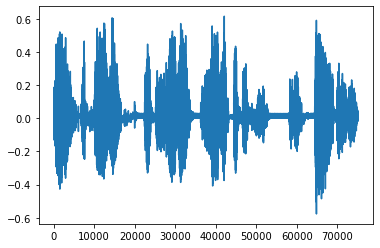

In [16]:
plt.plot(flat_predictions_multiseq)

In [17]:
# real audio flatten to hear
y_test_flatten = np.array(y_test)
y_test_flatten = list(y_test_flatten.reshape(y_test_flatten.size,))
#y_test_flatten

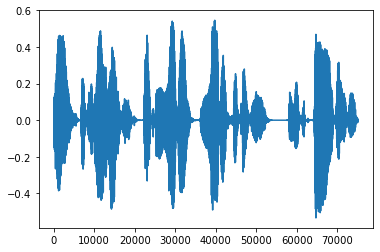

In [18]:
plt.plot(y_test_flatten)

In [19]:
import librosa, librosa.display
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd

# predict
ipd.Audio(flat_predictions_multiseq, rate=16000)

In [20]:
# real
ipd.Audio(y_test_flatten, rate=16000)

In [21]:
import soundfile as sf
sr = 16000
sf.write("/home/shh/Desktop/LSTM_Final/revise/Inpainted_results/RyanSpeech/SingleSpeaker_RyanSpeech_original.wav", y_test_flatten, sr)
sf.write("/home/shh/Desktop/LSTM_Final/revise/Inpainted_results/RyanSpeech/SingleSpeaker_RyanSpeech_2layers_predicted.wav", flat_predictions_multiseq, sr)

## (2) 3 layers LSTM

/home/shh/anaconda3/envs/LSTM/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


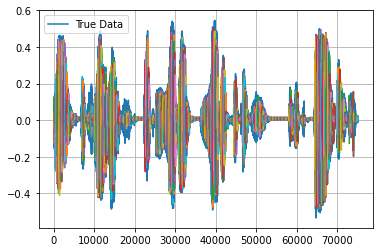

In [10]:
# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq, y_test, prediction_len=80)

In [11]:
# this function is to flatten list object
# predictions_multiseq is list, so need to flatten to plot and hear
def flatten(l):
    return [item for sublist in l for item in sublist]

In [12]:
flat_predictions_multiseq = flatten(predictions_multiseq)

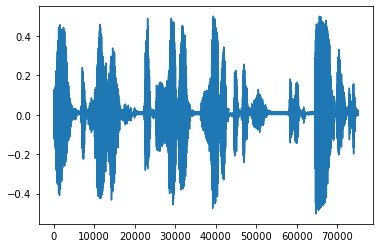

In [13]:
plt.plot(flat_predictions_multiseq)

In [14]:
# real audio flatten to hear
y_test_flatten = np.array(y_test)
y_test_flatten = list(y_test_flatten.reshape(y_test_flatten.size,))
#y_test_flatten

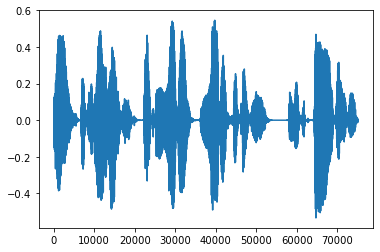

In [15]:
plt.plot(y_test_flatten)

In [16]:
import librosa, librosa.display
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd

# predict
ipd.Audio(flat_predictions_multiseq, rate=16000)

In [17]:
# real
ipd.Audio(y_test_flatten, rate=16000)

In [18]:
import soundfile as sf
sr = 16000
# sf.write("/home/shh/Desktop/LSTM_Final/revise/Inpainted_results/RyanSpeech/SingleSpeaker_RyanSpeech_original.wav", y_test_flatten, sr)
sf.write("/home/shh/Desktop/LSTM_Final/revise/Inpainted_results/RyanSpeech/SingleSpeaker_RyanSpeech_3layers_predicted.wav", flat_predictions_multiseq, sr)

## (3) 4 layers LSTM

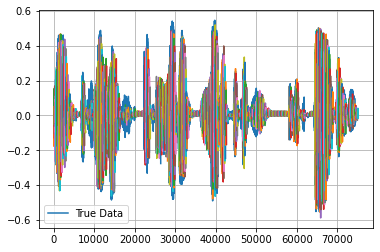

In [10]:
# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq, y_test, prediction_len=80)

In [11]:
# this function is to flatten list object
# predictions_multiseq is list, so need to flatten to plot and hear
def flatten(l):
    return [item for sublist in l for item in sublist]

In [12]:
flat_predictions_multiseq = flatten(predictions_multiseq)

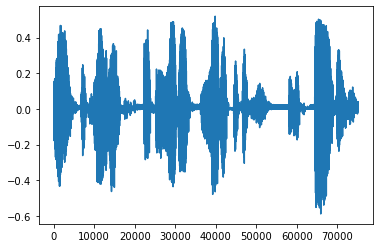

In [13]:
plt.plot(flat_predictions_multiseq)

In [14]:
# real audio flatten to hear
y_test_flatten = np.array(y_test)
y_test_flatten = list(y_test_flatten.reshape(y_test_flatten.size,))
#y_test_flatten

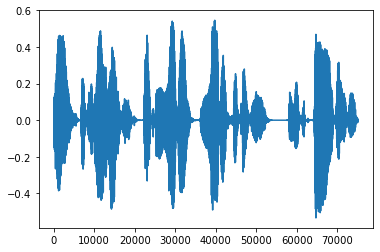

In [15]:
plt.plot(y_test_flatten)

In [16]:
import librosa, librosa.display
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd

# predict
ipd.Audio(flat_predictions_multiseq, rate=16000)

In [17]:
# real
ipd.Audio(y_test_flatten, rate=16000)

In [18]:
import soundfile as sf
sr = 16000
# sf.write("/home/shh/Desktop/LSTM_Final/revise/Inpainted_results/RyanSpeech/SingleSpeaker_RyanSpeech_original.wav", y_test_flatten, sr)
sf.write("/home/shh/Desktop/LSTM_Final/revise/Inpainted_results/RyanSpeech/SingleSpeaker_RyanSpeech_4layers_predicted.wav", flat_predictions_multiseq, sr)

## (4) 5 layers LSTM

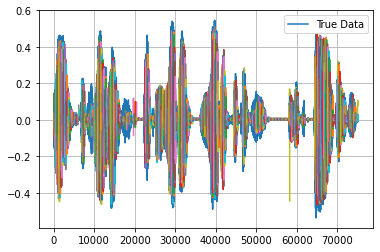

In [10]:
# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq, y_test, prediction_len=80)

In [11]:
# this function is to flatten list object
# predictions_multiseq is list, so need to flatten to plot and hear
def flatten(l):
    return [item for sublist in l for item in sublist]

In [12]:
flat_predictions_multiseq = flatten(predictions_multiseq)

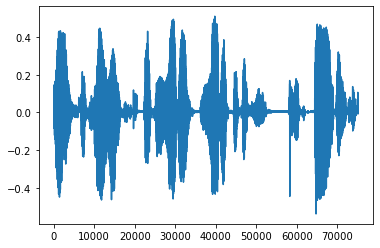

In [13]:
plt.plot(flat_predictions_multiseq)

In [14]:
# real audio flatten to hear
y_test_flatten = np.array(y_test)
y_test_flatten = list(y_test_flatten.reshape(y_test_flatten.size,))
#y_test_flatten

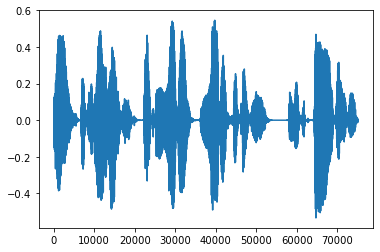

In [15]:
plt.plot(y_test_flatten)

In [16]:
import librosa, librosa.display
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd

# predict
ipd.Audio(flat_predictions_multiseq, rate=16000)

In [17]:
# real
ipd.Audio(y_test_flatten, rate=16000)

In [18]:
import soundfile as sf
sr = 16000
# sf.write("/home/shh/Desktop/LSTM_Final/revise/Inpainted_results/RyanSpeech/SingleSpeaker_RyanSpeech_original.wav", y_test_flatten, sr)
sf.write("/home/shh/Desktop/LSTM_Final/revise/Inpainted_results/RyanSpeech/SingleSpeaker_RyanSpeech_5layers_predicted.wav", flat_predictions_multiseq, sr)

## (5) 6 layers LSTM

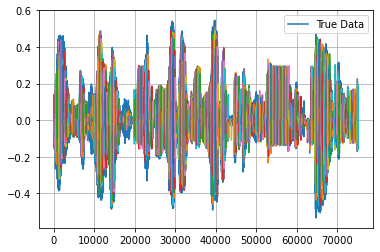

In [10]:
# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq, y_test, prediction_len=80)

In [11]:
# this function is to flatten list object
# predictions_multiseq is list, so need to flatten to plot and hear
def flatten(l):
    return [item for sublist in l for item in sublist]

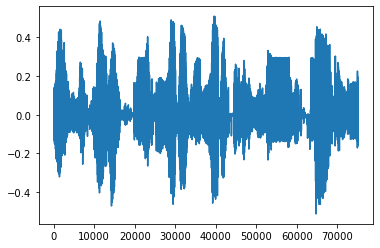

In [12]:
flat_predictions_multiseq = flatten(predictions_multiseq)
plt.plot(flat_predictions_multiseq)

In [13]:
# real audio flatten to hear
y_test_flatten = np.array(y_test)
y_test_flatten = list(y_test_flatten.reshape(y_test_flatten.size,))
#y_test_flatten

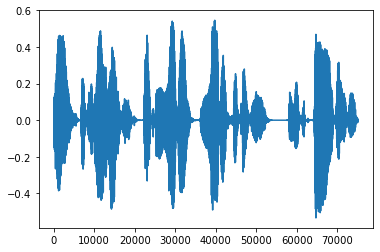

In [14]:
plt.plot(y_test_flatten)

In [15]:
import librosa, librosa.display
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd

# predict
ipd.Audio(flat_predictions_multiseq, rate=16000)

In [16]:
# real
ipd.Audio(y_test_flatten, rate=16000)

In [17]:
import soundfile as sf
sr = 16000
# sf.write("/home/shh/Desktop/LSTM_Final/revise/Inpainted_results/RyanSpeech/SingleSpeaker_RyanSpeech_original.wav", y_test_flatten, sr)
sf.write("/home/shh/Desktop/LSTM_Final/revise/Inpainted_results/RyanSpeech/SingleSpeaker_RyanSpeech_6layers_predicted.wav", flat_predictions_multiseq, sr)